# Similarity Splitter 

In [1]:
import os,sys, tempfile, pandas as pd, shutil, logging, glob
sys.path.append("src")

In [2]:
base_data_dir = "tmp"

In [3]:
working_dir =  "tempspliiterhajkA"
if os.path.exists(working_dir) : shutil.rmtree(working_dir)
os.makedirs(working_dir, exist_ok=True)

In [4]:
def scores_to_df(scores, details, data_set, data_type, task_type):
    df = pd.DataFrame()
    for k , v in scores.items():
        df[k] = v
        
    for k , v in details.items():
        df[k + "_detail"] = v
    
    df["data_set"] = data_set + " " + data_type
    df["task_type"] = task_type
         
    return df

In [5]:
logging.basicConfig(level="WARN", handlers=[logging.StreamHandler(sys.stdout)],
                        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

In [6]:
thresholds = [0,25,50,75,100]
ngrams = [1]
num_parts = 4

### 1. BC2GM

[Biocreative II gene mention](https://biocreative.bioinformatics.udel.edu/tasks/biocreative-ii/) overlap. Please download the test and train files for this task from the BioCreative Website.


In [7]:
bc2gm_train_file = os.path.join(base_data_dir, "train.in")
bc2gm_test_file = os.path.join(base_data_dir, "test.in")

bc2gm_train_eval_file = os.path.join(base_data_dir, "trainGENE.eval")
bc2gm_test_eval_file = os.path.join(base_data_dir, "testGENE.eval")

bc2gm_test_alteval_file = os.path.join(base_data_dir, "testALTGENE.eval")

# This is the predictions
bc2gm_predictions_file = os.path.join(base_data_dir, "bc2gm_result_test_pred.txt")

In [8]:
from bc2_gene_mention import BC2GeneMentionText 


bc2gmrun = BC2GeneMentionText()



### BC2GM : Threshold based simlarity

In [9]:

bc2gm_out_dir_text =  os.path.join(working_dir, "bc2gm_text")
os.makedirs(bc2gm_out_dir_text, exist_ok=True)
result_detail = bc2gmrun.run_similarity_threshold_splitter("text", bc2gm_train_file,  bc2gm_test_file, bc2gm_out_dir_text, bc2gm_test_eval_file, bc2gm_test_alteval_file,bc2gm_predictions_file ,thresholds,ngrams)
df_bc2_gm_text = pd.DataFrame(result_detail)
df_bc2_gm_text["dataset"] = "BC2GM (text)"

In [10]:
df_bc2_gm_text.head()

,ngram,min,max,num,percent,f-score,precision,recall,dataset
0,1,0,25.0,990,19.80,0.744872,0.688389,0.811453,BC2GM (text)
1,1,25,50.0,3706,74.12,0.823754,0.782895,0.869114,BC2GM (text)
2,1,50,75.0,257,5.14,0.870801,0.838308,0.905914,BC2GM (text)
3,1,75,NaN,47,0.94,0.784810,0.794872,0.775000,BC2GM (text)
4,-1,0,100.0,5000,100.00,0.817055,0.774819,0.864160,BC2GM (text)


In [11]:
bc2gm_out_dir_anno =  os.path.join(working_dir, "bc2gm_text")
os.makedirs(bc2gm_out_dir_anno, exist_ok=True)
result_detail = bc2gmrun.run_similarity_threshold_splitter("eval", bc2gm_train_eval_file,  bc2gm_test_eval_file, bc2gm_out_dir_anno, bc2gm_test_eval_file, bc2gm_test_alteval_file, bc2gm_predictions_file ,thresholds,ngrams)
df_bc2_gm_anno = pd.DataFrame(result_detail)
df_bc2_gm_anno["dataset"] = "BC2GM (anno)"

In [12]:
df_bc2_gm_anno.head()

,ngram,min,max,num,percent,f-score,precision,recall,dataset
0,1,0,25.0,1059,16.727215,0.844237,0.843861,0.844613,BC2GM (anno)
1,1,25,50.0,352,5.559943,0.808743,0.800000,0.817680,BC2GM (anno)
2,1,50,75.0,1565,24.719634,0.834215,0.813616,0.855885,BC2GM (anno)
3,1,75,NaN,3355,52.993208,0.854116,0.831631,0.877852,BC2GM (anno)
4,-1,0,100.0,6331,100.000000,0.817055,0.774819,0.864160,BC2GM (anno)


### BC2GM : Sorted based simlarity

In [13]:

bc2gm_out_dir_text =  os.path.join(working_dir, "bc2gm_text")
os.makedirs(bc2gm_out_dir_text, exist_ok=True)
result_score, result_detail = bc2gmrun.run_similarity_parts_splitter("text", bc2gm_train_file,  bc2gm_test_file, bc2gm_out_dir_text, bc2gm_test_eval_file, bc2gm_test_alteval_file,bc2gm_predictions_file ,num_parts)
df_bc2_gm_text_parts_score = pd.DataFrame(result_score)
df_bc2_gm_text_parts_score["dataset"] = "BC2GM (text)"

Exact matches Unigram, 39 / 5000
Exact matches Bigram, 26 / 5000
Exact matches Trigram, 26 / 5000


In [14]:
df_bc2_gm_text_parts_score.head()

,ngram,min,max,num,percent,f-score,precision,recall,dataset
0,1,0.000000,26.311741,1250,25.0,0.754003,0.698113,0.819620,BC2GM (text)
1,1,26.311741,31.622777,1250,25.0,0.798122,0.745178,0.859164,BC2GM (text)
2,1,31.622777,38.332594,1250,25.0,0.821266,0.782819,0.863685,BC2GM (text)
3,1,38.348249,100.000000,1250,25.0,0.858576,0.830023,0.889164,BC2GM (text)
4,-1,0.000000,100.000000,5000,100.0,0.817055,0.774819,0.864160,BC2GM (text)


## 2. SST2 Dataset

In [15]:
sst2_train_file = os.path.join("tmp", "train.tsv")
sst2_test_file = os.path.join("tmp", "test.tsv")
sst2_sentiment_labels_file  =  os.path.join("tmp", "sentiment_labels.txt")
sst2_dictionary_file  =  os.path.join("tmp", "dictionary.txt") 


# This is the predictions
sst2_predictions_file = os.path.join(base_data_dir, "sst2-output.csv")

In [16]:
from sst2_dataset import SST2Dataset
sst2_run=SST2Dataset()


###  SST2 : Threshold based simlarity

In [17]:

sst2_out_dir_text =  os.path.join(working_dir, "sst2_text")
os.makedirs(bc2gm_out_dir_text, exist_ok=True)
result_detail = sst2_run.run_similarity_threshold_splitter(sst2_train_file,sst2_test_file,  sst2_predictions_file ,sst2_sentiment_labels_file,sst2_dictionary_file, thresholds,ngrams)
df_sst2_text = pd.DataFrame(result_detail)
df_sst2_text["dataset"] = "SST2 (text)"

2021-01-22 11:28:45,358 - sst2_dataset - WARNING - ['1', 'a very witty take on change , risk and romance , and the film uses humor to make its points about acceptance and growth .'] not found
2021-01-22 11:28:45,364 - sst2_dataset - WARNING - ['0', 'he has not learned that storytelling is what the movies are about .'] not found
2021-01-22 11:28:45,366 - sst2_dataset - WARNING - ['1', "a recent favorite at sundance , this white-trash satire will inspire the affection of even those unlucky people who never owned a cassette of def leppard 's pyromania ."] not found
2021-01-22 11:28:45,374 - sst2_dataset - WARNING - ['0', "a frantic search for laughs , with a hit-to-miss ratio that does n't exactly favor the audience ."] not found
2021-01-22 11:28:45,380 - sst2_dataset - WARNING - ['0', 'no . .'] not found
2021-01-22 11:28:45,384 - sst2_dataset - WARNING - ['1', 'this bold and lyrical first feature from raja amari expands the pat notion that middle-aged women just wan na have fun into a ro

In [18]:
df_sst2_text.head()

,ngram,min,max,num,percent,f-score,precision,recall,accuracy,dataset
0,1,0,25.0,20,1.098298,0.666667,0.600000,0.750000,0.850000,SST2 (text)
1,1,25,50.0,1216,66.776496,0.937598,0.916159,0.960064,0.934211,SST2 (text)
2,1,50,75.0,522,28.665568,0.925490,0.870849,0.987448,0.927203,SST2 (text)
3,1,75,NaN,63,3.459638,0.968750,0.968750,0.968750,0.968254,SST2 (text)
4,-1,0,100.0,1821,100.000000,0.934048,0.903527,0.966704,0.932455,SST2 (text)


###  SST2 : Sorted based simlarity

In [19]:
num_parts = 4

In [20]:

bc2gm_out_dir_text =  os.path.join(working_dir, "bc2gm_text")
os.makedirs(bc2gm_out_dir_text, exist_ok=True)
result_score, result_detail = sst2_run.run_similarity_parts_splitter(  sst2_train_file,sst2_test_file,  sst2_predictions_file ,sst2_sentiment_labels_file,sst2_dictionary_file, num_parts)
df_sst2_text_parts_score = pd.DataFrame(result_score)
df_sst2_text_parts_score["dataset"] = "SST2 (text)"

2021-01-22 11:29:03,320 - sst2_dataset - WARNING - ['1', 'a very witty take on change , risk and romance , and the film uses humor to make its points about acceptance and growth .'] not found
2021-01-22 11:29:03,321 - sst2_dataset - WARNING - ['0', 'he has not learned that storytelling is what the movies are about .'] not found
2021-01-22 11:29:03,335 - sst2_dataset - WARNING - ['1', "a recent favorite at sundance , this white-trash satire will inspire the affection of even those unlucky people who never owned a cassette of def leppard 's pyromania ."] not found
2021-01-22 11:29:03,352 - sst2_dataset - WARNING - ['0', "a frantic search for laughs , with a hit-to-miss ratio that does n't exactly favor the audience ."] not found
2021-01-22 11:29:03,355 - sst2_dataset - WARNING - ['0', 'no . .'] not found
2021-01-22 11:29:03,358 - sst2_dataset - WARNING - ['1', 'this bold and lyrical first feature from raja amari expands the pat notion that middle-aged women just wan na have fun into a ro

In [21]:
df_sst2_text_parts_score.head()

,ngram,min,max,num,percent,f-score,precision,recall,accuracy,dataset
0,1,0.000000,36.514837,456,25.041186,0.929336,0.907950,0.951754,0.927632,SST2 (text)
1,1,36.514837,43.643578,456,25.041186,0.937120,0.913043,0.962500,0.932018,SST2 (text)
2,1,43.643578,53.452248,456,25.041186,0.941685,0.912134,0.973214,0.940789,SST2 (text)
3,1,53.452248,100.000000,453,24.876442,0.927602,0.879828,0.980861,0.929360,SST2 (text)
4,-1,0.000000,100.000000,1821,100.000000,0.934048,0.903527,0.966704,0.932455,SST2 (text)


## 3. BC3 Article classification

In [22]:
bc3_act_train_file = os.path.join("tmp", "bc3_act_all_records.tsv")
bc3_act_test_file = os.path.join("tmp", "bc3_act_all_records_test.tsv")


bc3_act_train_eval_file = os.path.join(base_data_dir, "bc3_act_gold_standard.tsv")
bc3_act_test_eval_file = os.path.join(base_data_dir, "bc3_act_gold_standard_test.tsv")


# This is the predictions
bc3_act_predictions_file = os.path.join(base_data_dir, "bc3act-output.csv")

In [23]:
from bc3_article_classification import BC3ArticleClassification

bc3actrun = BC3ArticleClassification()


###  BC3 Article classification : Threshold based simlarity

In [24]:

bc3act_out_dir_text =  os.path.join(working_dir, "bc3act_text")
os.makedirs(bc2gm_out_dir_text, exist_ok=True)
result_detail = bc3actrun.run_similarity_threshold_splitter( bc3_act_train_file,  bc3_act_test_file, bc3_act_test_eval_file, bc3_act_predictions_file ,thresholds,ngrams)
df_bc3_act_text = pd.DataFrame(result_detail)
df_bc3_act_text["dataset"] = "BC3ACT (text)"

/Users/aeg/envs/nlp-train-test-overlap-detector/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
df_bc3_act_text.head()

,ngram,min,max,num,percent,f-score,precision,recall,accuracy,dataset
0,1,0,25.0,2817,46.950000,0.564270,0.430233,0.819620,0.858005,BC3ACT (text)
1,1,25,50.0,3062,51.033333,0.598513,0.460000,0.856383,0.788374,BC3ACT (text)
2,1,50,75.0,120,2.000000,0.630137,0.534884,0.766667,0.775000,BC3ACT (text)
3,1,75,NaN,1,0.016667,0.000000,0.000000,0.000000,0.000000,BC3ACT (text)
4,-1,0,100.0,6000,100.000000,0.587107,0.451061,0.840659,0.820667,BC3ACT (text)


###  BC3 Article classification : Sorted based simlarity

In [26]:
num_parts = 4

In [27]:

bc2gm_out_dir_text =  os.path.join(working_dir, "bc2gm_text")
os.makedirs(bc2gm_out_dir_text, exist_ok=True)
result_score, result_detail = bc3actrun.run_similarity_parts_splitter(bc3_act_train_file,  bc3_act_test_file, bc3_act_test_eval_file, bc3_act_predictions_file ,num_parts)
df_bc3_act_text_parts_score = pd.DataFrame(result_score)
df_bc3_act_text_parts_score["dataset"] = "BC3ACT (text)"

In [28]:
df_bc3_act_text_parts_score.head()

,ngram,min,max,num,percent,f-score,precision,recall,accuracy,dataset
0,1,6.277610,20.090702,1500,25.0,0.575758,0.445312,0.814286,0.888000,BC3ACT (text)
1,1,20.095193,25.676454,1500,25.0,0.559322,0.423077,0.825000,0.826667,BC3ACT (text)
2,1,25.677981,31.913278,1500,25.0,0.602067,0.465070,0.853480,0.794667,BC3ACT (text)
3,1,31.917000,75.011317,1500,25.0,0.598109,0.460838,0.851852,0.773333,BC3ACT (text)
4,-1,0.000000,100.000000,6000,100.0,0.587107,0.451061,0.840659,0.820667,BC3ACT (text)


## Summary

In [29]:
formatters = { t:lambda x: "{:.1%}".format(x).replace("%","")  for t in {"f-score", "precision", "recall","accuracy"}}
formatters['min']=lambda x: "{:.1f}".format(x)
formatters['max']=lambda x: "{:.1f}".format(x)
formatters['percent']=lambda x: "{:.1f}".format(x)


float_formatter = lambda x: "{:.2f}".format(x)

### Summary Threshold

In [30]:
df_threshold_summary = pd.concat([df_bc2_gm_text, df_bc3_act_text,df_sst2_text])
df_threshold_summary["max"] = df_threshold_summary["max"].fillna(100)

In [31]:
df_threshold_summary.sort_values(by=["dataset", "ngram", "min", "max"])

,ngram,min,max,num,percent,f-score,precision,recall,dataset,accuracy
4,-1,0,100.0,5000,100.000000,0.817055,0.774819,0.864160,BC2GM (text),NaN
0,1,0,25.0,990,19.800000,0.744872,0.688389,0.811453,BC2GM (text),NaN
1,1,25,50.0,3706,74.120000,0.823754,0.782895,0.869114,BC2GM (text),NaN
2,1,50,75.0,257,5.140000,0.870801,0.838308,0.905914,BC2GM (text),NaN
3,1,75,100.0,47,0.940000,0.784810,0.794872,0.775000,BC2GM (text),NaN
4,-1,0,100.0,6000,100.000000,0.587107,0.451061,0.840659,BC3ACT (text),0.820667
0,1,0,25.0,2817,46.950000,0.564270,0.430233,0.819620,BC3ACT (text),0.858005
1,1,25,50.0,3062,51.033333,0.598513,0.460000,0.856383,BC3ACT (text),0.788374
2,1,50,75.0,120,2.000000,0.630137,0.534884,0.766667,BC3ACT (text),0.775000
3,1,75,100.0,1,0.016667,0.000000,0.000000,0.000000,BC3ACT (text),0.000000


In [32]:
def map_theshold(min, max):
    if min==0 and max==25: return "1I"
    if min==25 and max==50: return "2I"
    if min==50 and max==75: return "3I"
    if min==75 and max==100: return "3I"
    if min==0 and max==100: return "F"

    return "-"
    
df_threshold_summary["SR"] = df_threshold_summary.apply(lambda x: map_theshold(x["min"], x["max"]), axis=1)
print(df_threshold_summary.query("ngram in (-1,1)")
      .sort_values(by=["dataset",  "min", "percent"], ascending=[True, True, False])
    [["dataset",  "SR", "percent", "f-score", "precision" , "recall","accuracy" ]]
      .to_latex(float_format=float_formatter, formatters=formatters, index=False)
      .replace("nan","-")
      .replace("(text)", "")
     
     )

\begin{tabular}{llrrrrr}
\toprule
       dataset &  SR & percent & f-score & precision & recall & accuracy \\
\midrule
  BC2GM  &   F &   100.0 &    81.7 &      77.5 &   86.4 &      - \\
  BC2GM  &  1I &    19.8 &    74.5 &      68.8 &   81.1 &      - \\
  BC2GM  &  2I &    74.1 &    82.4 &      78.3 &   86.9 &      - \\
  BC2GM  &  3I &     5.1 &    87.1 &      83.8 &   90.6 &      - \\
  BC2GM  &  3I &     0.9 &    78.5 &      79.5 &   77.5 &      - \\
 BC3ACT  &   F &   100.0 &    58.7 &      45.1 &   84.1 &     82.1 \\
 BC3ACT  &  1I &    47.0 &    56.4 &      43.0 &   82.0 &     85.8 \\
 BC3ACT  &  2I &    51.0 &    59.9 &      46.0 &   85.6 &     78.8 \\
 BC3ACT  &  3I &     2.0 &    63.0 &      53.5 &   76.7 &     77.5 \\
 BC3ACT  &  3I &     0.0 &     0.0 &       0.0 &    0.0 &      0.0 \\
   SST2  &   F &   100.0 &    93.4 &      90.4 &   96.7 &     93.2 \\
   SST2  &  1I &     1.1 &    66.7 &      60.0 &   75.0 &     85.0 \\
   SST2  &  2I &    66.8 &    93.8 &      91.6 &   

### Summary Split by quartile

In [33]:
df_quartile_summary = pd.concat([df_bc2_gm_text_parts_score, df_bc3_act_text_parts_score,df_sst2_text_parts_score])

In [34]:
df_quartile_summary .sort_values(by=["dataset", "ngram","min","max" ])

,ngram,min,max,num,percent,f-score,precision,recall,dataset,accuracy
4,-1,0.000000,100.000000,5000,100.000000,0.817055,0.774819,0.864160,BC2GM (text),NaN
0,1,0.000000,26.311741,1250,25.000000,0.754003,0.698113,0.819620,BC2GM (text),NaN
1,1,26.311741,31.622777,1250,25.000000,0.798122,0.745178,0.859164,BC2GM (text),NaN
2,1,31.622777,38.332594,1250,25.000000,0.821266,0.782819,0.863685,BC2GM (text),NaN
3,1,38.348249,100.000000,1250,25.000000,0.858576,0.830023,0.889164,BC2GM (text),NaN
4,-1,0.000000,100.000000,6000,100.000000,0.587107,0.451061,0.840659,BC3ACT (text),0.820667
0,1,6.277610,20.090702,1500,25.000000,0.575758,0.445312,0.814286,BC3ACT (text),0.888000
1,1,20.095193,25.676454,1500,25.000000,0.559322,0.423077,0.825000,BC3ACT (text),0.826667
2,1,25.677981,31.913278,1500,25.000000,0.602067,0.465070,0.853480,BC3ACT (text),0.794667
3,1,31.917000,75.011317,1500,25.000000,0.598109,0.460838,0.851852,BC3ACT (text),0.773333


dataset
BC2GM (text)     AxesSubplot(0.125,0.125;0.775x0.755)
BC3ACT (text)    AxesSubplot(0.125,0.125;0.775x0.755)
SST2 (text)      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

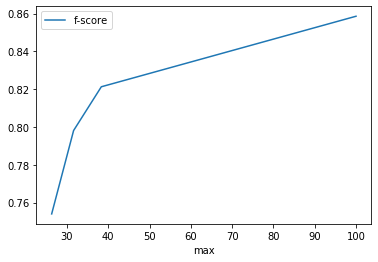

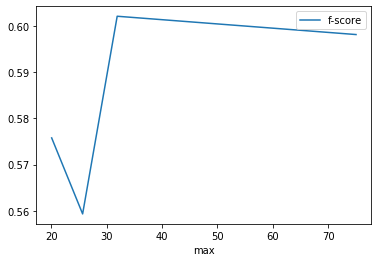

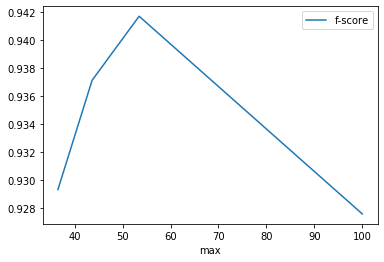

In [35]:
import matplotlib.pyplot as plt 

df_quartile_summary.query(" (max - min) != 100").groupby(["dataset"]).plot(y="f-score", x="max", subplots=False)

In [36]:
print(df_quartile_summary.query("ngram in (1,-1)")
      .sort_values(by=["dataset", "ngram","min","max" ])
      [["dataset", "min", "max", "f-score", "precision" , "recall","accuracy" ]]
      .to_latex( float_format=float_formatter, formatters=formatters, index=False)
      .replace("(text)","")
      .replace("nan","-")
     )
        

\begin{tabular}{lrrrrrr}
\toprule
       dataset &  min &   max & f-score & precision & recall & accuracy \\
\midrule
  BC2GM  &  0.0 & 100.0 &    81.7 &      77.5 &   86.4 &      - \\
  BC2GM  &  0.0 &  26.3 &    75.4 &      69.8 &   82.0 &      - \\
  BC2GM  & 26.3 &  31.6 &    79.8 &      74.5 &   85.9 &      - \\
  BC2GM  & 31.6 &  38.3 &    82.1 &      78.3 &   86.4 &      - \\
  BC2GM  & 38.3 & 100.0 &    85.9 &      83.0 &   88.9 &      - \\
 BC3ACT  &  0.0 & 100.0 &    58.7 &      45.1 &   84.1 &     82.1 \\
 BC3ACT  &  6.3 &  20.1 &    57.6 &      44.5 &   81.4 &     88.8 \\
 BC3ACT  & 20.1 &  25.7 &    55.9 &      42.3 &   82.5 &     82.7 \\
 BC3ACT  & 25.7 &  31.9 &    60.2 &      46.5 &   85.3 &     79.5 \\
 BC3ACT  & 31.9 &  75.0 &    59.8 &      46.1 &   85.2 &     77.3 \\
   SST2  &  0.0 & 100.0 &    93.4 &      90.4 &   96.7 &     93.2 \\
   SST2  &  0.0 &  36.5 &    92.9 &      90.8 &   95.2 &     92.8 \\
   SST2  & 36.5 &  43.6 &    93.7 &      91.3 &   96.2 &     93.